There are 97 rows and 2 columns.
[[ 1.      1.      9.4536]
 [ 1.      1.      6.5894]
 [ 1.      1.     18.959 ]
 [ 1.      1.      5.0546]
 [ 1.      1.      5.5649]
 [ 1.      1.      6.3589]
 [ 1.      1.      5.0702]
 [ 1.      1.      5.8014]
 [ 1.      1.      5.2524]
 [ 1.      1.      5.8918]
 [ 1.      1.     13.176 ]
 [ 1.      1.      8.4084]
 [ 1.      1.     12.828 ]
 [ 1.      1.      8.3829]
 [ 1.      1.      5.3077]
 [ 1.      1.      6.3534]
 [ 1.      1.      5.8598]
 [ 1.      1.      6.002 ]
 [ 1.      1.     21.279 ]
 [ 1.      1.      7.6031]]
[[ 1.      1.      1.      1.      1.      1.      1.      1.      1.
   1.      1.      1.      1.      1.      1.      1.      1.      1.
   1.      1.    ]
 [ 1.      1.      1.      1.      1.      1.      1.      1.      1.
   1.      1.      1.      1.      1.      1.      1.      1.      1.
   1.      1.    ]
 [ 9.4536  6.5894 18.959   5.0546  5.5649  6.3589  5.0702  5.8014  5.2524
   5.8918 13.176   8.4084 12.828  

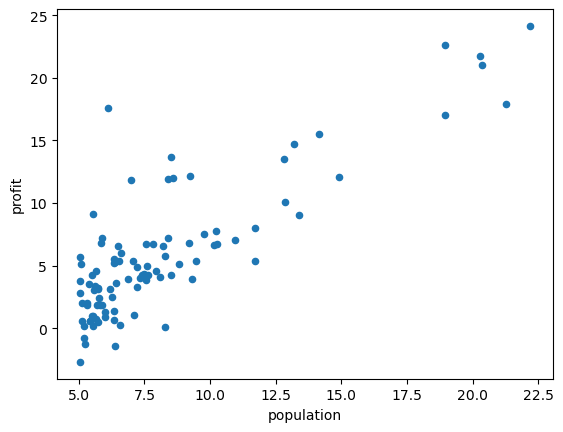

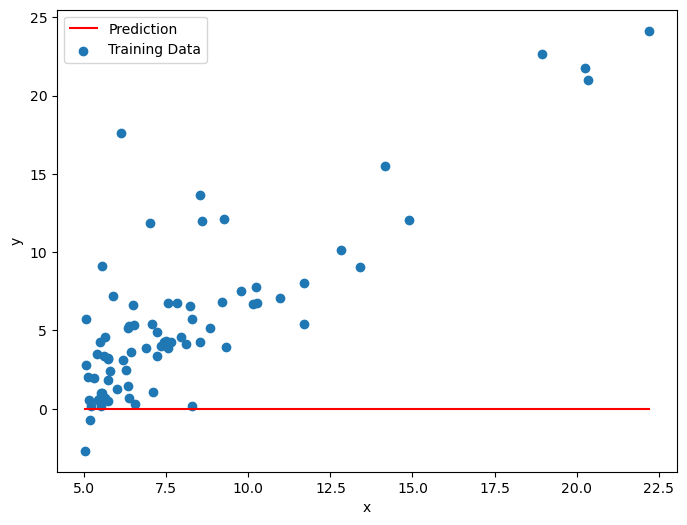

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Any, Callable
import helpers

restaurant_df = pd.read_csv('data/restaurant_data.csv')

print(f"There are {restaurant_df.shape[0]} rows and {restaurant_df.shape[1]} columns.")
restaurant_df.head(5)
restaurant_df.plot(kind='scatter', x='population', y='profit')
X_train, y_train, X_test, y_test, feature_names = helpers.preprocess_data(restaurant_df, label="profit", train_size=0.8, seed=42)

def add_constant(X: np.ndarray) -> np.ndarray:
    X_with_offset = np.insert(X, 0, 1, axis=1)
    return X_with_offset

X_train = add_constant(X_train)
X_test = add_constant(X_test)

print(np.matmul(add_constant(X_test).T,add_constant(X_test)))
print(f"Features: {feature_names}")
print('Training set features:')
print(f'X_train: \n {X_train[:10]}')
print('\nTraining set labels:')
print(f'y_train: \n {y_train[:10]}')
print('Training set shape:')
print(f'X: {X_train.shape}, y: {y_train.shape}')
print('\nTest set shape:')
print(f'X: {X_test.shape}, y: {y_test.shape}')

def mse_loss(X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
    loss=(1/len(y))*(np.matmul((np.matmul(X,w)-y).T,np.matmul(X,w)-y))
    return loss

zero_weights = np.zeros(X_train.shape[1])
print(zero_weights)
train_loss = mse_loss(X_train, y_train, zero_weights)
test_loss = mse_loss(X_test, y_test, zero_weights)
print(f"Train loss: {train_loss:.5f}")
print(f"Test loss: {test_loss:.5f}")
helpers.plot_linear_regression_2d(X=X_train, y=y_train, w=zero_weights)

def mse_gradient(X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
  
    grad = (2/len(y))*(np.matmul(X.T,np.matmul(X,w)-y))
    ### END CODE HERE ###
    return grad

def gradient_descent(X: np.ndarray, y: np.ndarray, w: np.ndarray, alpha: float, max_iters: int) -> (np.ndarray, np.ndarray):
    losses = np.zeros(max_iters)
    
    for n_iter in range(max_iters):
        w = w-alpha*mse_gradient(X,y,w)
        # Compute the loss with the updated w
        loss = (1/len(y))*(np.matmul((matmul(X,w)-y).T,np.matmul(X,w)-y))
       
        losses[n_iter] = loss
        
        if n_iter % (max_iters / 20) == 0:
            if w.shape[0] == 2: 
                print(f"Iteration {n_iter}: loss={loss:.5f}, w0={w[0]:.3f}, w1={w[1]:.3f}")
            else:
                print(f"Iteration {n_iter}: loss={loss:.5f}")

    return w, losses